In [ ]:
import pandas as pd 
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt

# Importing ETH 2016-2023 Dataset

In [ ]:
#from google.colab import drive
  #drive.mount('/content/drive')

In [ ]:
eth_data = "/content/drive/MyDrive/PROBABILITY/Ethereum_compiled_data.csv"  
df = pd.read_csv(eth_data)


<ipython-input-3-77bd7928dcf8>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(eth_data)


**Checking for inaccuracies in the dataset | 1 min interval**

In [ ]:
display(df.sort_values('Date'))

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,returns,timestamp_ms,datetime
0,1.462801e+09,2016-05-09 13:32:00,ETHUSD,0.00,12.00,0.00,12.00,4.156276e+00,-12.00,1.462801e+12,2016-05-09 13:32:00
1,1.462801e+09,2016-05-09 13:33:00,ETHUSD,12.00,12.00,10.00,10.00,4.349751e+01,2.00,1.462801e+12,2016-05-09 13:33:00
2,1.462801e+09,2016-05-09 13:34:00,ETHUSD,10.00,10.00,10.00,10.00,8.000000e+00,0.00,1.462801e+12,2016-05-09 13:34:00
3,1.462801e+09,2016-05-09 13:35:00,ETHUSD,10.00,10.00,10.00,10.00,6.000000e+01,0.00,1.462801e+12,2016-05-09 13:35:00
4,1.462801e+09,2016-05-09 13:36:00,ETHUSD,10.00,10.00,10.00,10.00,3.750000e-01,0.00,1.462801e+12,2016-05-09 13:36:00
...,...,...,...,...,...,...,...,...,...,...,...
2294943,NaN,2023-03-31 23:35:00,NaN,1824.01,1824.59,1823.72,1823.78,2.014939e+06,0.23,NaN,NaT
2294944,NaN,2023-03-31 23:40:00,NaN,1823.78,1824.19,1821.97,1822.19,2.497808e+06,1.59,NaN,NaT
2294945,NaN,2023-03-31 23:45:00,NaN,1822.19,1823.62,1822.19,1823.07,1.406538e+06,-0.88,NaN,NaT
2294946,NaN,2023-03-31 23:50:00,NaN,1823.08,1823.08,1821.05,1821.22,3.821305e+06,1.86,NaN,NaT


In [ ]:
df.describe

,Unix Timestamp,Open,High,Low,Close,Volume,returns,timestamp_ms
count,1.984012e+06,2.294948e+06,2.294948e+06,2.294948e+06,2.294948e+06,2.294948e+06,2.294948e+06,1.984012e+06
mean,6.154583e+11,4.564102e+02,4.569825e+02,4.558261e+02,4.564109e+02,6.096215e+05,-7.375243e-04,1.523516e+12
std,7.621617e+11,7.309035e+02,7.322366e+02,7.295531e+02,7.309037e+02,2.817010e+06,2.465299e+00,3.586443e+10
min,1.462801e+09,0.000000e+00,5.990000e+00,0.000000e+00,5.990000e+00,0.000000e+00,-3.585000e+02,1.462801e+12
25%,1.492561e+09,1.079500e+02,1.080000e+02,1.078900e+02,1.079500e+02,0.000000e+00,0.000000e+00,1.492561e+12
50%,1.522321e+09,2.090000e+02,2.090900e+02,2.089100e+02,2.090000e+02,1.073895e-01,0.000000e+00,1.522321e+12
75%,1.554502e+12,4.410100e+02,4.414600e+02,4.407000e+02,4.410100e+02,3.800007e+01,0.000000e+00,1.554502e+12
max,1.586995e+12,4.862020e+03,4.868000e+03,4.847730e+03,4.862010e+03,2.255694e+08,4.532300e+02,1.586995e+12


In [ ]:
df.sort_values('returns')

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,returns,timestamp_ms,datetime
2098803,NaN,2021-05-19 12:55:00,NaN,2006.68,2400.00,2004.01,2365.18,1.338223e+08,-358.50,NaN,NaT
2098807,NaN,2021-05-19 13:15:00,NaN,2127.61,2420.00,2099.98,2415.18,9.103366e+07,-287.57,NaN,NaT
2130740,NaN,2021-09-07 15:10:00,NaN,3035.87,3370.76,3025.99,3317.06,1.370850e+08,-281.19,NaN,NaT
2096921,NaN,2021-05-13 00:05:00,NaN,3635.10,3890.65,3628.18,3868.49,1.697079e+08,-233.39,NaN,NaT
2098806,NaN,2021-05-19 13:10:00,NaN,1920.02,2151.99,1888.00,2127.61,1.028001e+08,-207.59,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...
2096920,NaN,2021-05-13 00:00:00,NaN,3810.15,3832.06,3500.00,3637.53,2.255694e+08,172.62,NaN,NaT
2096296,NaN,2021-05-10 20:00:00,NaN,3990.18,3991.28,3701.86,3725.70,1.480570e+08,264.48,NaN,NaT
2098805,NaN,2021-05-19 13:05:00,NaN,2220.08,2224.90,1920.00,1925.16,1.122512e+08,294.92,NaN,NaT
2098802,NaN,2021-05-19 12:50:00,NaN,2347.29,2377.70,1960.00,2006.17,2.099895e+08,341.12,NaN,NaT


# Shapiro-Wilk Test on ETH 2016-2023 Dataset | 1 min interval

In [ ]:
stat1, p1 = shapiro(df.returns)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
print("5 min interval ETH 2016-2023 returns \n")
print("Statistic Value = %.5f" % (stat1))
print("p Value = %.5f" % (p1))

5 min interval ETH 2016-2023 returns 

Statistic Value = 0.33266
p Value = 0.00000


**INTERPRETATION**

ETH Returns in a 5-min interval is **not normally distributed**.

the *Shapiro-Wilk test* provided us a p-value < 0.05 : p = 0.00, hence, we reject the null hypothesis that the data is normally distributed.

Plotting the ETH Returns 1 min interval


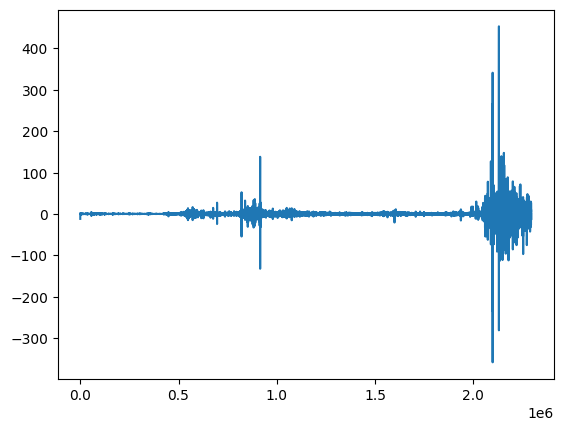

In [ ]:

plt.plot(df.returns)


# ETH 2016-2023 Dataset | 5 min interval

In [ ]:
display(df[::5])

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,returns
0,1.462801e+09,2016-05-09 13:32:00,ETHUSD,0.00,12.00,0.00,12.00,4.156276e+00,-12.00
5,1.462801e+09,2016-05-09 13:37:00,ETHUSD,10.00,10.00,10.00,10.00,1.000000e+01,0.00
10,1.462801e+09,2016-05-09 13:42:00,ETHUSD,10.00,10.00,10.00,10.00,0.000000e+00,0.00
15,1.462802e+09,2016-05-09 13:47:00,ETHUSD,10.00,10.00,10.00,10.00,0.000000e+00,0.00
20,1.462802e+09,2016-05-09 13:52:00,ETHUSD,9.60,9.60,9.60,9.60,0.000000e+00,0.00
...,...,...,...,...,...,...,...,...,...
2294925,NaN,2023-03-31 22:05:00,NaN,1824.09,1826.43,1824.09,1825.22,2.100289e+06,-1.13
2294930,NaN,2023-03-31 22:30:00,NaN,1826.89,1827.47,1825.47,1827.12,1.617841e+06,-0.23
2294935,NaN,2023-03-31 22:55:00,NaN,1827.51,1828.00,1826.19,1826.34,1.895194e+06,1.17
2294940,NaN,2023-03-31 23:20:00,NaN,1824.67,1825.88,1824.52,1824.93,2.584943e+06,-0.26


# Shapiro-Wilk Test on ETH 2016-2023 Dataset | 5 min interval

In [ ]:
stat, p = shapiro(df.returns[::5])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
print("5 min interval ETH 2016-2023 returns \n")
print("Statistic Value = %.5f" % (stat))
print("p Value = %.5f" % (p))

5 min interval ETH 2016-2023 returns 

Statistic Value = 0.33037
p Value = 0.00000


**INTERPRETATION**

ETH Returns in a 5-min interval is **not normally distributed**.

the *Shapiro-Wilk test* provided us a p-value < 0.05 : p = 0.00, hence, we reject the null hypothesis that the data is normally distributed.

Plotting the ETH Returns 5 min interval

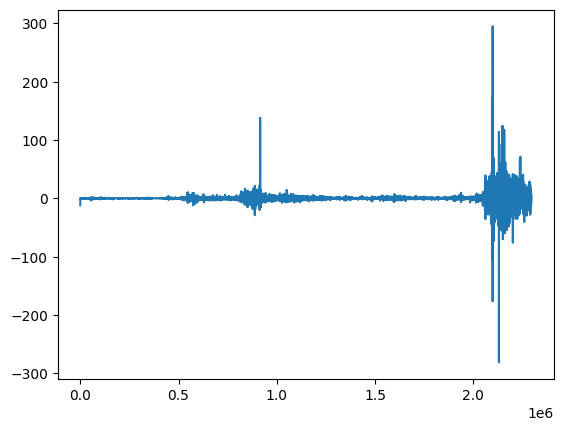

In [ ]:
plt.plot(df.returns[::5])